In [1]:
import os, time
import numpy as np
import torch.utils.data
import torch
import torch.nn as nn
import torch.nn.functional as F

from FOS_dataset import FOS_set, transform

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\36394\anaconda3\envs\art_med\lib\site-packages\torchvision\transforms\_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in 0.14. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
c:\Users\36394\anaconda3\envs\art_med\lib\site-packages\torchvision\transforms\_transforms_video.py:25: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in 0.14. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


## Test the model

In [2]:
dir_train_set = r'C:\Users\36394\Study\GWU\PHD in Biomedical Engineer\Research\FOS\Autism_dataset\Vision_dataset\train'
dir_val_set = r'C:\Users\36394\Study\GWU\PHD in Biomedical Engineer\Research\FOS\Autism_dataset\Vision_dataset\val'
batch_size = 2

# Load the model
model = torch.hub.load("facebookresearch/pytorchvideo", model="slowfast_r50", pretrained=True)
model.blocks[6].proj = nn.Linear(2304, 4)
# model.load_state_dict(torch.load(r'cv_model.pt'))


# Define dataset
train_set = FOS_set(dir_train_set, transform=transform)
val_set = FOS_set(dir_val_set, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)

model = model.cuda()
model.eval()


# Confusion matrix
y_true = []
y_pred = []
for i, (inputs, labels) in enumerate(val_loader):
    inputs = [i.cuda() for i in inputs]
    labels = labels.cuda()
    outputs = model(inputs)
    y_true.extend(labels.cpu().numpy())
    y_pred.extend(outputs.argmax(dim=1).cpu().numpy())
    if i % 100 == 0:
        print(f'Batch {i+1}/{len(val_loader)}')

cm = confusion_matrix(y_true, y_pred)
print(cm)

Using cache found in C:\Users\36394/.cache\torch\hub\facebookresearch_pytorchvideo_main


Batch 1/313
Batch 101/313
Batch 201/313
Batch 301/313
[[ 24  81  30  25]
 [  0   1   2   0]
 [ 35 238  99  83]
 [  0   5   2   0]]


In [3]:
np.sum(np.array(y_true) == np.array(y_pred))/len(y_true)

0.1984

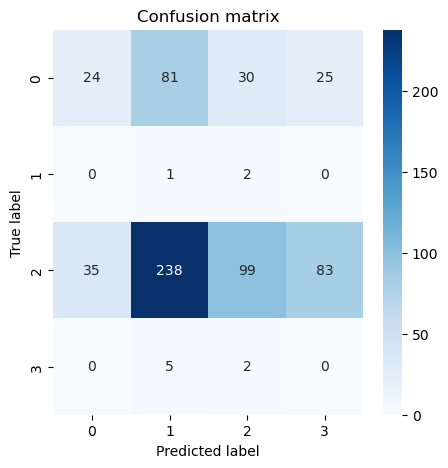

In [4]:
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()